In [6]:
import os
import torch
import fairseq
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import librosa
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2Model

In [10]:
model_name = "facebook/wav2vec2-large-960h"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = Wav2Vec2Model.from_pretrained(model_name)

def extract_features(audio_file_path):
    audio, sr = librosa.load(audio_file_path, sr=16000)
        
    input_values = feature_extractor(audio, return_tensors="pt", padding=True, 
                                 feature_size=1, sampling_rate=16000 ).input_values
    hidden_states = model(input_values).last_hidden_state
    features_last_cnn_layer = model(input_values).extract_features
   
    return hidden_states, features_last_cnn_layer

audio_file_path="C:/research/code/wav2vec/clip.wav"
hidden_states_f, features_last_cnn_layer_f = extract_features(audio_file_path)
print(hidden_states_f.shape)


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([1, 400, 1024])


In [3]:
main_folder_path = "C:/research/code/wav2vec/prc_data"

min_duration = 0.6



model_name = "facebook/wav2vec2-large-960h"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = Wav2Vec2Model.from_pretrained(model_name)



def extract_features(audio_file_path):
    audio, sr = librosa.load(audio_file_path, sr=16000)
    duration = librosa.get_duration(y=audio, sr=sr)
    if duration < min_duration:
        pad_samples = int((min_duration - duration) * sr)
        audio = np.pad(audio, (0, pad_samples), mode='constant')
    elif duration > min_duration:
        audio = audio[:int(min_duration * sr)]
        print(audio.shape)
    
    audio_reshaped = np.reshape(audio, (1, -1))
        
    input_values = feature_extractor(audio_reshaped, return_tensors="pt", padding=True, 
                                 feature_size=1, sampling_rate=16000 ).input_values
    hidden_states = model(input_values).last_hidden_state
    features_last_cnn_layer = model(input_values).extract_features
   
    return hidden_states, features_last_cnn_layer


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
all_hidden_states_f=[]
all_features_last_cnn_layer_f=[]
all_labels = []

# Iterate through each subfolder and its contents
for root, dirs, files in os.walk(main_folder_path):
    for folder_name in dirs:
        folder_path = os.path.join(root, folder_name)
        # Iterate through each audio file in the subfolder
        for audio_file_name in os.listdir(folder_path):
            audio_file_path = os.path.join(folder_path, audio_file_name)
            if audio_file_name.endswith(".wav"):  # Adjust the extension if needed
                # Extract features and append to lists
                hidden_states_f, features_last_cnn_layer_f = extract_features(audio_file_path)
                
                
                all_hidden_states_f.append(hidden_states_f)
                all_features_last_cnn_layer_f.append(features_last_cnn_layer_f)
                all_labels.append(folder_name)
                
                # Print the file name along with the shape of the tensor
                print(f"File name: {audio_file_name}, Shape of tensor {len(all_hidden_states_f) - 1}: {hidden_states_f.shape}")

(9600,)
File name: 0_01_0.wav, Shape of tensor 0: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_13.wav, Shape of tensor 1: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_15.wav, Shape of tensor 2: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_17.wav, Shape of tensor 3: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_29.wav, Shape of tensor 4: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_35.wav, Shape of tensor 5: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_36.wav, Shape of tensor 6: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_40.wav, Shape of tensor 7: torch.Size([1, 29, 1024])
(9600,)
File name: 0_01_41.wav, Shape of tensor 8: torch.Size([1, 29, 1024])
File name: 0_01_9.wav, Shape of tensor 9: torch.Size([1, 29, 1024])
(9600,)
File name: 0_02_20.wav, Shape of tensor 10: torch.Size([1, 29, 1024])
(9600,)
File name: 0_02_22.wav, Shape of tensor 11: torch.Size([1, 29, 1024])
(9600,)
File name: 0_02_25.wav, Shape of tensor 12: torch.Size([1, 29, 1024])
(9600,

File name: 6_02_19.wav, Shape of tensor 111: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_23.wav, Shape of tensor 112: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_24.wav, Shape of tensor 113: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_28.wav, Shape of tensor 114: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_35.wav, Shape of tensor 115: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_36.wav, Shape of tensor 116: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_41.wav, Shape of tensor 117: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_7.wav, Shape of tensor 118: torch.Size([1, 29, 1024])
(9600,)
File name: 6_02_8.wav, Shape of tensor 119: torch.Size([1, 29, 1024])
(9600,)
File name: 7_01_12.wav, Shape of tensor 120: torch.Size([1, 29, 1024])
(9600,)
File name: 7_01_16.wav, Shape of tensor 121: torch.Size([1, 29, 1024])
(9600,)
File name: 7_01_19.wav, Shape of tensor 122: torch.Size([1, 29, 1024])
(9600,)
File name: 7_01_21.wav, Shape of tensor 123: torch.Siz

In [10]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score

all_hidden_states_f_tensor = torch.cat(all_hidden_states_f, dim=0)
all_hidden_states_f_array = all_hidden_states_f_tensor.detach().numpy()

# Step 1: Prepare the data
# Reshape the audio features array to fit the SVM classifier
X_train = all_hidden_states_f_array.reshape(-1, 29 * 1024)  # Assuming 29 time steps and 1024 features per time step
# Ensure that labels are in suitable format
y_train = all_labels

# Step 2: Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Step 3: Evaluate the SVM classifier
# Make predictions on the training data
y_pred_train = svm_classifier.predict(X_train)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

Training Accuracy: 1.0


C:\Users\hijaz\anaconda3\envs\wav2vec\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0 : 29
Cluster 1 : 34
Cluster 2 : 22
Cluster 3 : 12
Cluster 4 : 18
Cluster 5 : 37


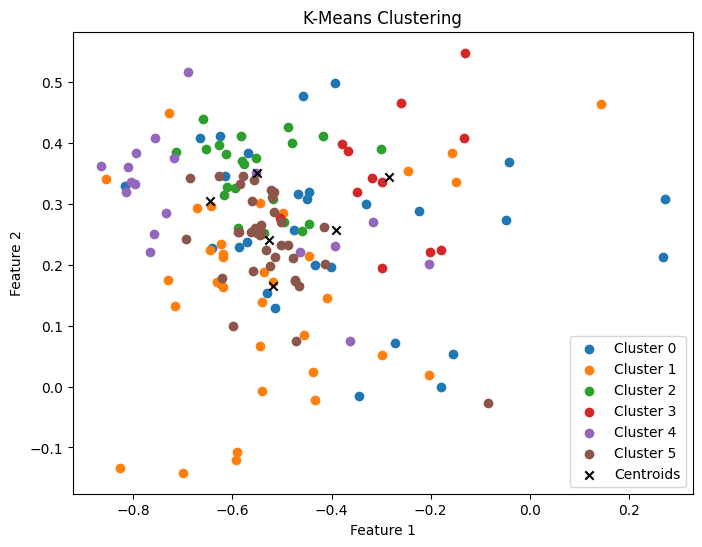

In [12]:
# Step 4: Perform k-means clustering
k = 6  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# Optionally, you can analyze the cluster assignments
# For example, you can print the number of samples in each cluster
for i in range(k):
    print("Cluster", i, ":", sum(cluster_labels == i))
    
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_train[cluster_labels == i, 0], X_train[cluster_labels == i, 1], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

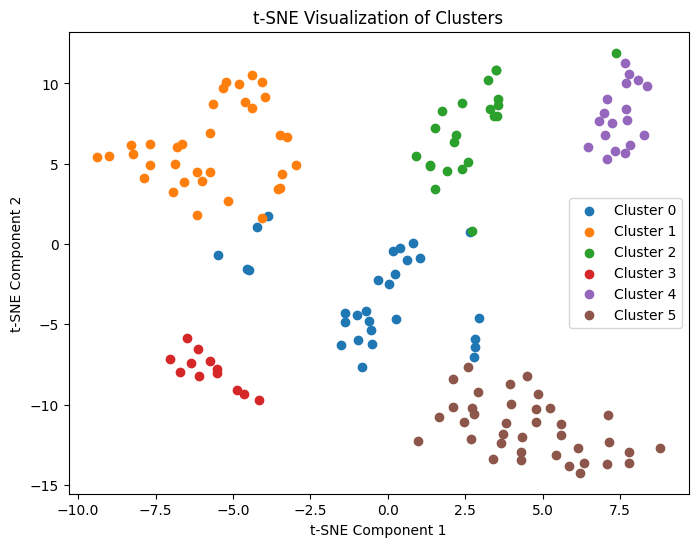

In [13]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit t-SNE model to the data
X_train_tsne = tsne.fit_transform(X_train)

# Plot the t-SNE embeddings
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_train_tsne[cluster_labels == i, 0], X_train_tsne[cluster_labels == i, 1], label=f'Cluster {i}')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()